Nama : Ovadilla Aisyah Rahma

NIM : 200411100033

Kelas : PPW A

# Crawling Berita
1. crawling data dari berita online
2. ekstraksi kalimat dari berita online
3. bentuk TF-IDF dari kalimat
4. bentuk cosinus similaritas dari langkah ke 3
5. bentuk dari langkah 4 suatu graph (library)
6. hitung closeness centrality dari langkah 5 (library)

In [21]:
!pip install requests
!pip install beautifulsoup4

In [22]:
import pandas as pd
import requests
import csv
from bs4 import BeautifulSoup

## Crawling Data Berita Politik

In [23]:
header={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}

linkberita = 'https://sorotpolitik.kompas.com/'
listpolitik = []
n = 37

for halaman in range(1, n+1):
  req = requests.get(linkberita)
  soup = BeautifulSoup(req.text, 'html.parser')
  items = soup.findAll('div', 'article__list clearfix') #class semua berita
  for it in items:
    link = it.find('a','article__link')['href'] #class perberita

    req2 = requests.get(link)
    soup2 = BeautifulSoup(req2.text, 'html.parser')
    judul = soup2.find('h1', 'read__title').text    #class judul berita
    isi = "".join(soup2.find('div', 'read__content').text.split('\n'))
    #print(judul)
    #print(isi)

    listpolitik.append([judul,isi])

## Crawling Data Berita Nasional

In [24]:
header={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}

linkberita = 'https://nasional.kompas.com/search/'
listt = []
n = 13

for halaman in range(1, n+1):
  req = requests.get(linkberita)
  soup = BeautifulSoup(req.text, 'html.parser')
  items = soup.findAll('div', 'article__list clearfix') #class semua berita
  for it in items:
    link = it.find('a','article__link')['href'] #class perberita

    req2 = requests.get(link)
    soup2 = BeautifulSoup(req2.text, 'html.parser')
    judul = soup2.find('h1', 'read__title').text    #class judul berita
    isi = "".join(soup2.find('div', 'read__content').text.split('\n'))
    #print(judul)
    #print(isi)

    listt.append([judul,isi])

Menggabungkan 2 kategori crawling berita yaitu nasional dan politik

In [34]:
nasional = pd.DataFrame(listt, columns=['Judul', 'Isi'])
nasional['Label'] = 'Nasional'

politik = pd.DataFrame(listpolitik, columns=['Judul', 'Isi'])
politik['Label'] = 'Politik'

gabung = [nasional, politik]
combined_df = pd.concat(gabung, ignore_index=True)
print(combined_df)

#combined_df.to_csv('beritanasionalpolitik.csv',  index=False)

                                                 Judul  \
0    Warga Depok Keluhkan KIS Tiba-tiba Non-aktif, ...   
1    IDI Konfirmasi Kenaikan Kasus Covid-19 di Indo...   
2    Didukung Pergerakan Perempuan Muda Nahdliyin, ...   
3    KSAD Maruli Minta Puspenerbad Susun Teori Baru...   
4    Setiap Sesi Debat, Capres dan Cawapres Saling ...   
..                                                 ...   
586  Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...   
587  Soal Rencana Pengalihan Anggaran Bansos, TKN P...   
588  Soal Perubahan Format Debat, TKN Sebut Siap De...   
589  Cegah Politisasi Bansos Jelang Pemilu 2024, Sa...   
590  Target Menangkan Anies-Muhaimin pada Pemilu 20...   

                                                   Isi     Label  
0     DEPOK, KOMPAS.com - Kepala Dinas Sosial Kota ...  Nasional  
1    JAKARTA, KOMPAS.com - Ketua Satuan Tugas (Satg...  Nasional  
2    JAKARTA, KOMPAS.com - Pergerakan Perempuan Mud...  Nasional  
3    JAKARTA, KOMPAS.com - Kepala S

In [35]:
# acak data nasional dan politik
df = pd.concat([nasional, politik])
df = df.sample(frac=1).reset_index(drop=True)
df

,Judul,Isi,Label
0,"Sempat Keliru Disebut Gibran, Ini Manfaat Asam...",KOMPAS.com - Asam folat menjadi perbincangan p...,Politik
1,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik
2,"Soal Bantuan Gizi Prabowo-Gibran, Dewan Pakar ...",KOMPAS.com- Dewan Pakar Tim Kampanye Nasional ...,Politik
3,KSAD Maruli Minta Puspenerbad Susun Teori Baru...,"JAKARTA, KOMPAS.com - Kepala Staf TNI Angkatan...",Nasional
4,Ketua TKD Sebut Prabowo-Gibran Punya Peluang M...,"JAKARTA, KOMPAS.com - Ketua Tim Kampanye Daera...",Nasional
...,...,...,...
586,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik
587,Pejuang Wadas Jateng Siap Bersinergi Menangkan...,KOMPAS.com - Ratusan Pejuang Wadas Jawa Tengah...,Politik
588,"PKS Tolak RUU DKJ, Ahmad Syaikhu: Jika Disahka...",KOMPAS.com - Partai Keadilan Sejahtera (PKS) m...,Politik
589,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik


## Import Data Ke CSV

In [36]:
df.to_csv('kompasberita.csv',  index=False)

In [37]:
df = pd.read_csv('/content/kompasberita.csv')
df

,Judul,Isi,Label
0,"Sempat Keliru Disebut Gibran, Ini Manfaat Asam...",KOMPAS.com - Asam folat menjadi perbincangan p...,Politik
1,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik
2,"Soal Bantuan Gizi Prabowo-Gibran, Dewan Pakar ...",KOMPAS.com- Dewan Pakar Tim Kampanye Nasional ...,Politik
3,KSAD Maruli Minta Puspenerbad Susun Teori Baru...,"JAKARTA, KOMPAS.com - Kepala Staf TNI Angkatan...",Nasional
4,Ketua TKD Sebut Prabowo-Gibran Punya Peluang M...,"JAKARTA, KOMPAS.com - Ketua Tim Kampanye Daera...",Nasional
...,...,...,...
586,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik
587,Pejuang Wadas Jateng Siap Bersinergi Menangkan...,KOMPAS.com - Ratusan Pejuang Wadas Jawa Tengah...,Politik
588,"PKS Tolak RUU DKJ, Ahmad Syaikhu: Jika Disahka...",KOMPAS.com - Partai Keadilan Sejahtera (PKS) m...,Politik
589,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik


In [38]:
df.shape

(591, 3)

In [39]:
df.isnull().sum()

Judul    0
Isi      0
Label    0
dtype: int64

# Pre Processing

## Cleaning

In [40]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')
#nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
def cleaning(text):
    # Remove non-alphabetic characters (letters, spaces, and punctuation other than periods)
    text = re.sub(r'[^a-zA-Z\s.,]', '', text).strip()
    return text

df['Cleaning'] = df['Isi'].apply(cleaning)
df['Cleaning']

0      KOMPAS.com  Asam folat menjadi perbincangan pu...
1      KOMPAS.com  Juru Bicara Jubir Fraksi Partai Ke...
2      KOMPAS.com Dewan Pakar Tim Kampanye Nasional T...
3      JAKARTA, KOMPAS.com  Kepala Staf TNI Angkatan ...
4      JAKARTA, KOMPAS.com  Ketua Tim Kampanye Daerah...
                             ...                        
586    KOMPAS.com  Juru Bicara Jubir Fraksi Partai Ke...
587    KOMPAS.com  Ratusan Pejuang Wadas Jawa Tengah ...
588    KOMPAS.com  Partai Keadilan Sejahtera PKS meno...
589    KOMPAS.com  Juru Bicara Jubir Fraksi Partai Ke...
590    KOMPAS.com  Sekretaris Tim Kampanye Nasional T...
Name: Cleaning, Length: 591, dtype: object

In [42]:
df['Isi'] = df['Isi'].apply(lambda x: cleaning(x))

df.shape

(591, 4)

## Tokenisasi


In [43]:
from nltk.tokenize import sent_tokenize
# Fungsi untuk mengekstrak artikel menjadi kalimat
def extract_sentences(article):
    sentences = sent_tokenize(article)
    return sentences

# Menerapkan fungsi extract_sentences ke setiap baris dalam kolom 'artikel'
df['Kalimat'] = df['Cleaning'].apply(extract_sentences)
df['Kalimat']

0      [KOMPAS.com  Asam folat menjadi perbincangan p...
1      [KOMPAS.com  Juru Bicara Jubir Fraksi Partai K...
2      [KOMPAS.com Dewan Pakar Tim Kampanye Nasional ...
3      [JAKARTA, KOMPAS.com  Kepala Staf TNI Angkatan...
4      [JAKARTA, KOMPAS.com  Ketua Tim Kampanye Daera...
                             ...                        
586    [KOMPAS.com  Juru Bicara Jubir Fraksi Partai K...
587    [KOMPAS.com  Ratusan Pejuang Wadas Jawa Tengah...
588    [KOMPAS.com  Partai Keadilan Sejahtera PKS men...
589    [KOMPAS.com  Juru Bicara Jubir Fraksi Partai K...
590    [KOMPAS.com  Sekretaris Tim Kampanye Nasional ...
Name: Kalimat, Length: 591, dtype: object

In [44]:
df

,Judul,Isi,Label,Cleaning,Kalimat
0,"Sempat Keliru Disebut Gibran, Ini Manfaat Asam...",KOMPAS.com Asam folat menjadi perbincangan pu...,Politik,KOMPAS.com Asam folat menjadi perbincangan pu...,[KOMPAS.com Asam folat menjadi perbincangan p...
1,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,Politik,KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,[KOMPAS.com Juru Bicara Jubir Fraksi Partai K...
2,"Soal Bantuan Gizi Prabowo-Gibran, Dewan Pakar ...",KOMPAS.com Dewan Pakar Tim Kampanye Nasional T...,Politik,KOMPAS.com Dewan Pakar Tim Kampanye Nasional T...,[KOMPAS.com Dewan Pakar Tim Kampanye Nasional ...
3,KSAD Maruli Minta Puspenerbad Susun Teori Baru...,"JAKARTA, KOMPAS.com Kepala Staf TNI Angkatan ...",Nasional,"JAKARTA, KOMPAS.com Kepala Staf TNI Angkatan ...","[JAKARTA, KOMPAS.com Kepala Staf TNI Angkatan..."
4,Ketua TKD Sebut Prabowo-Gibran Punya Peluang M...,"JAKARTA, KOMPAS.com Ketua Tim Kampanye Daerah...",Nasional,"JAKARTA, KOMPAS.com Ketua Tim Kampanye Daerah...","[JAKARTA, KOMPAS.com Ketua Tim Kampanye Daera..."
...,...,...,...,...,...
586,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,Politik,KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,[KOMPAS.com Juru Bicara Jubir Fraksi Partai K...
587,Pejuang Wadas Jateng Siap Bersinergi Menangkan...,KOMPAS.com Ratusan Pejuang Wadas Jawa Tengah ...,Politik,KOMPAS.com Ratusan Pejuang Wadas Jawa Tengah ...,[KOMPAS.com Ratusan Pejuang Wadas Jawa Tengah...
588,"PKS Tolak RUU DKJ, Ahmad Syaikhu: Jika Disahka...",KOMPAS.com Partai Keadilan Sejahtera PKS meno...,Politik,KOMPAS.com Partai Keadilan Sejahtera PKS meno...,[KOMPAS.com Partai Keadilan Sejahtera PKS men...
589,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,Politik,KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,[KOMPAS.com Juru Bicara Jubir Fraksi Partai K...


In [45]:
df.to_csv('processing_DataBerita.csv')

In [46]:
df['Kalimat'][0]

['KOMPAS.com  Asam folat menjadi perbincangan publik setelah calon wakil presiden cawapres nomor urut , Gibran Rakabuming Raka, keliru menyebutnya sebagai asam sulfat.',
 'Hal ini memicu pembahasan di kalangan masyarakat mengenai asam folat dan manfaatnya bagi ibu hamil.Seperti diketahui, program kerja pasangan calon presiden capres Prabowo Subianto dan cawapres Gibran menekankan pentingnya gizi untuk ibu hamil dan anak guna mencegah stunting.Salah satu inisiatif utama PrabowoGibran dalam hal tersebut adalah menyediakan susu gratis untuk ibu hamil, serta memberikan makan siang dan susu gratis untuk siswa di sekolah.Ibuibu yang hamil kami beri dukungan gizi karena mereka sudah mengandung sembilan bulan.',
 'Kami sekarang tidak mau lagi ada anak Indonesia yang kurang gizi, stunting, tidak boleh lagi ada istilah itu di bumi Indonesia, ujar Prabowo beberapa waktu lalu saat berkampanye di Kabupaten Lebak, Banten, Minggu .Baca juga Soal Salah Penyebutan Asam Folat oleh Gibran, Airlangga Masi

# Ekstraksi Fitur

## TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['Dokumen'] = df['Kalimat'].apply(lambda sentences: ' '.join(sentences))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Dokumen'])
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,abdul,abdullah,acara,achmad,acog,ad,ada,adalah,adanya,adapun,...,yang,yani,yanma,yasin,yearonyear,youtube,youtuber,yoy,zaki,zat
0,0.0,0.0,0.000000,0.0,0.023989,0.00000,0.018520,0.066632,0.0,0.014547,...,0.115274,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023989
1,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.015589,0.0,0.000000,...,0.031464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.021462,0.110308,0.0,0.000000,...,0.089056,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.33633,0.000000,0.000000,0.0,0.000000,...,0.059074,0.056055,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.041768,0.0,0.000000,0.00000,0.000000,0.030375,0.0,0.023210,...,0.040872,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.436308,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.015589,0.0,0.000000,...,0.031464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
587,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.144989,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
588,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.026239,0.0,0.000000,...,0.088265,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
589,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.015589,0.0,0.000000,...,0.031464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [48]:
# Menyimpan hasilnya ke dalam file CSV baru
output_file_path = 'berita_dalam_kalimat1.csv'
df.to_csv(output_file_path, index=False)

# Cosinus Similarity

Import library untuk menghitung cosinus similarity

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
len_kalimat = df['Dokumen'].shape[0]
temp = []
node = 0
for i in range(len_kalimat):
  for j in range(len_kalimat - i):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([df['Dokumen'][i], df['Dokumen'][i+j]])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity_score = cosine_sim[0][0]
    temp.append(["node-{} {}&{}".format(node, i, i+j), similarity_score])
    node +=1

In [51]:
temp

[['node-0 0&0', 1.0000000000000004],
 ['node-1 0&1', 0.15653176481674955],
 ['node-2 0&2', 0.5241732377802834],
 ['node-3 0&3', 0.19866218672199537],
 ['node-4 0&4', 0.15916023659859277],
 ['node-5 0&5', 1.0000000000000004],
 ['node-6 0&6', 0.15653176481674955],
 ['node-7 0&7', 0.1835726765549159],
 ['node-8 0&8', 0.13617311431483353],
 ['node-9 0&9', 0.17780249614160307],
 ['node-10 0&10', 0.17095908591525244],
 ['node-11 0&11', 0.13617311431483353],
 ['node-12 0&12', 1.0000000000000004],
 ['node-13 0&13', 0.20776968480350463],
 ['node-14 0&14', 0.17780249614160307],
 ['node-15 0&15', 0.2635464606704758],
 ['node-16 0&16', 0.5241732377802834],
 ['node-17 0&17', 0.2782001428115166],
 ['node-18 0&18', 0.5241732377802834],
 ['node-19 0&19', 0.1835726765549159],
 ['node-20 0&20', 0.28675947864522694],
 ['node-21 0&21', 0.28675947864522694],
 ['node-22 0&22', 0.30291931569904856],
 ['node-23 0&23', 0.15653176481674955],
 ['node-24 0&24', 0.2793302796169277],
 ['node-25 0&25', 0.15916023659

In [52]:
sentences = [df['Dokumen'][0], df['Dokumen'][1], df['Dokumen'][2],df['Dokumen'][3],df['Dokumen'][4],df['Dokumen'][5]]
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
G = nx.Graph()

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity_score = cosine_similarity([tfidf_matrix[i]], [tfidf_matrix[j]])[0][0]
        print(similarity_score)
        if similarity_score > 0.01:  # Sesuaikan threshold sesuai kebutuhan
            G.add_edge(sentences[i], sentences[j], weight=similarity_score)

0.1189245429662481
0.5001726214552389
0.13459579424148474
0.11799261765530289
1.000000000000002
0.11026738274886996
0.08631575275422829
0.16667052840486213
0.1189245429662481
0.11084744929693897
0.13685390503240974
0.5001726214552389
0.15206668832487852
0.13459579424148474
0.11799261765530289


# Graph

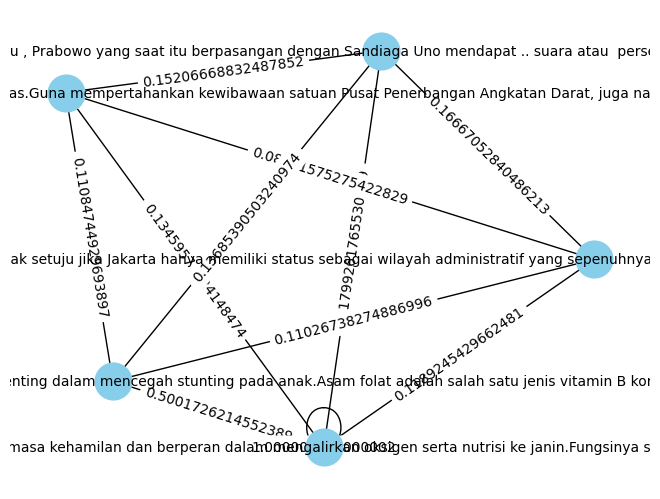

In [53]:
# Menggambar grafik
pos = nx.spring_layout(G)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [54]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')

sorted_closeness_centrality = {node: value for node, value in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

# Membuat DataFrame dari hasil yang diurutkan
df = pd.DataFrame(list(sorted_closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Menampilkan DataFrame
df

,Node,Closeness Centrality
0,KOMPAS.com Juru Bicara Jubir Fraksi Partai Ke...,8.295688
1,"JAKARTA, KOMPAS.com Kepala Staf TNI Angkatan ...",8.267440
2,"JAKARTA, KOMPAS.com Ketua Tim Kampanye Daerah...",6.973698
3,KOMPAS.com Dewan Pakar Tim Kampanye Nasional T...,6.812445
4,KOMPAS.com Asam folat menjadi perbincangan pu...,6.658844
